In [25]:
##importando as bibliotecas necessárias para realizar a análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler #biblioteca para normalizar os dados
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score,classification_report
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [2]:
##Dataframe ex IABD
data = pd.DataFrame({
    "Potencia":[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiencia":[92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade":[3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    "Tamanho":[50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de energia":['eficiente', 'ineficiente', 'ineficiente', 'eficiente', 'ineficiente', 'eficiente', 'ineficiente', 'eficiente', 'eficiente', 'ineficiente']})

In [3]:
##Selecionando os dados do dataframe

#separando as caracteristicas e o rotulo

X = data[['Potencia', 'Eficiencia', 'Idade', 'Tamanho']]

y = data['Consumo de energia']

In [4]:
# Separando os dados em treino e teste

#Dividindo o conjunto de dados em treinamento 70% e teste 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Treinando um modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Fazendo previsões no conjunto de teste

svm_model.predict(X_test)

array(['eficiente', 'ineficiente', 'eficiente'], dtype=object)

In [7]:
X_test

,Potencia,Eficiencia,Idade,Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [8]:
data.head(18)

,Potencia,Eficiencia,Idade,Tamanho,Consumo de energia
0,120,92,3,50,eficiente
1,80,65,8,45,ineficiente
2,100,75,5,55,ineficiente
3,110,85,4,60,eficiente
4,90,68,7,48,ineficiente
5,130,95,2,62,eficiente
6,70,60,10,40,ineficiente
7,105,80,6,58,eficiente
8,115,88,3,56,eficiente
9,85,70,9,47,ineficiente


In [15]:
#Avaliando as metricas do algoritmo de Machine Learning 

prev = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, prev)
print(accuracy)

1.0


In [17]:
classi_re = classification_report(y_test, prev)
print(classi_re)

              precision    recall  f1-score   support

   eficiente       1.00      1.00      1.00         2
 ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [18]:
cm = confusion_matrix(y_test, prev)
print(cm)

[[2 0]
 [0 1]]


1.0 [[2 0]
 [0 1]]


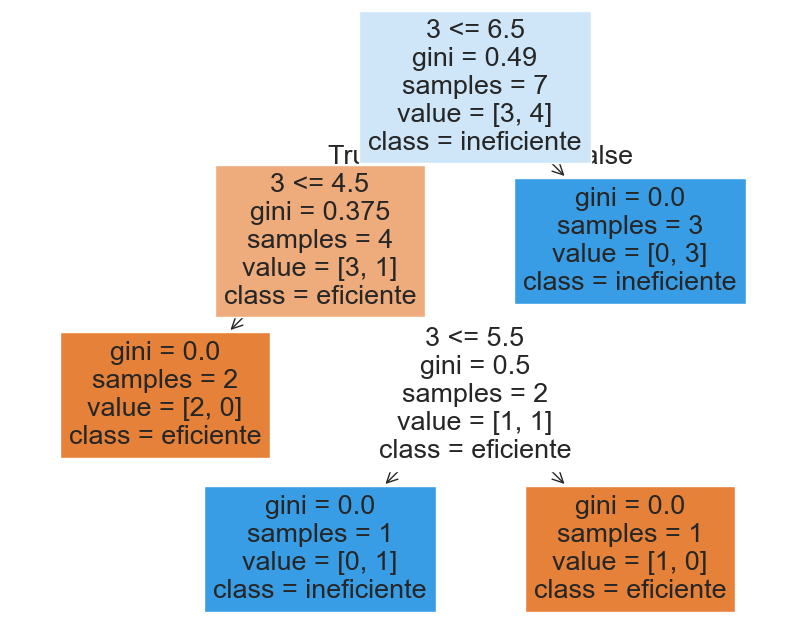

In [29]:
x=np.array(data['Idade'])
y=np.array(data['Consumo de energia'])
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1,1), y.reshape(-1,1),
                                                        test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste, prev)
matrix = confusion_matrix(y_teste, prev)
print(acurracy, matrix)
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

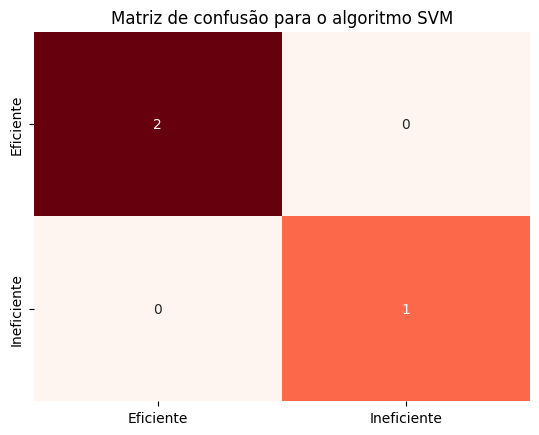

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=['Eficiente', 'Ineficiente'], yticklabels=['Eficiente', 'Ineficiente'])
plt.title("Matriz de confusão para o algoritmo SVM")

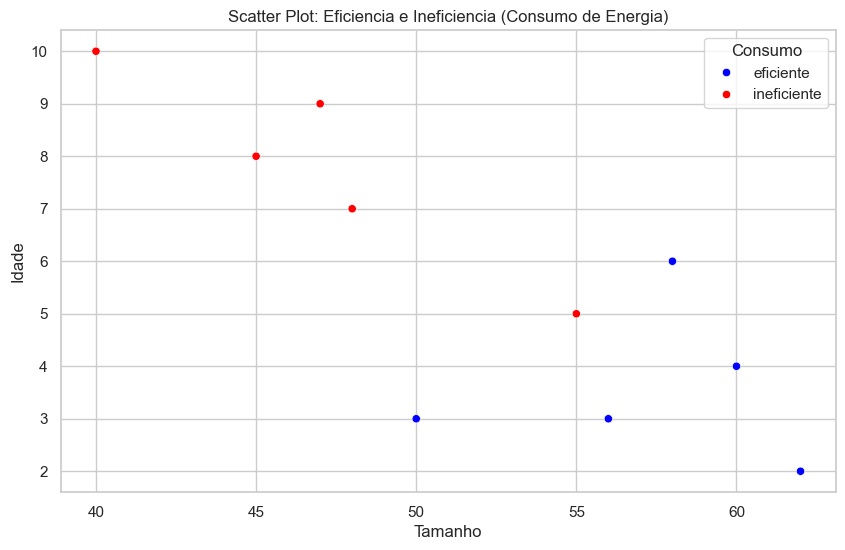

In [22]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"eficiente": "blue", "ineficiente": "red"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tamanho', y='Idade', hue='Consumo de energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Eficiencia e Ineficiencia (Consumo de Energia)')
plt.xlabel('Tamanho')
plt.ylabel('Idade')

# Mostrando o gráfico
plt.legend(title='Consumo')
plt.show()